In [1]:
# groupId - 동일한 그룹인지 확인하는 Id입니다. 같은 그룹일지라도 다른 match에는 다른 groubid가 사용
# matchId - match를 식별하기 위한 Id입니다. traning set과 testing set 모두 같은 match는 없음
# assists - 킬의 어시스트 수. 
# boosts - 부스팅 아이템 사용 수. (에너지 드링크,진통제,아드레날린 주사기)
# damageDealt - 딜량(단, 팀에 준 피해나 자해는 포함되지 않음)
# DBNOs - 기절시킨 횟수(기절=HP가 0이되서 기어다님=팀원이 부활 가능)
# headshotKills -	헤드샷 킬 수
# heals - 힐량 (붕대,구급상자)
# killPlace - 킬을 기반으로 한 경기의 순위
# killPoints - 킬 수로 산정한 ELO의 개념. 만약 rankPoints에 -1 이외의 값이 있다면, killPoints의 0값은 값이 없는 것으로 처리됨
# kills - 상대방을 죽인 횟수
# killStreaks - 짧은 시간안에 상대방을 죽인 횟수
# longestKill - 사망 시 사망한 플레이어와 본인의 거리
# matchDuration - 매치의 시간 (초 단위)
# matchType - 경기 타입.( 솔로, 듀오, 스쿼드)
# maxPlace - 매치 내에서 최악의 등수
# numGroups - 게임 내 총 그룹 수
# revives - 팀원을 소생시킨 횟수
# rideDistance - 차량을 타고 이동한 총 거리
# roadKills - 차로 쳐서 죽인횟수
# swimDistance - 수영으로 이동한거리
# teamKills - 팀킬 횟수
# vehicleDestroys - 차량 폭파 횟수
# walkDistance - 도보로 이동한 총 거리
# weaponsAcquired -얻은 무기의 수
# winPoints - 승리 횟수로 판단한 ELO의 개념
 #####winPlacePerc - 예측 목표, 1에 가까워질 수록 순위가 높아진다. (0부터 1까지의 값으로 나타냄. 1은 1등을, 0은 꼴등을 의미한다.)#####

In [2]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 223 kB/s 
     |████████████████████████████████| 13.1 MB 62.0 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=153b4d7a6c6d4ea3ca094e7178b04b363fc0a2e6c6d8da53f27543e6a2790bdd
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=abb92f1a02c2eea25f3eaeffdc9d675743c74c28a472021efdc61e642e556c20
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [3]:
!pip install category_encoders 
!pip install eli5 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 7.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 32.0 MB/s 
     |████████████████████████████████| 133 kB 91.4 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=f14421f70406af692071257cc3146172faa00322dd90d9d163dd8ab73eb8537f
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requi

In [4]:
import numpy as np                  
import pandas as pd                  
import matplotlib.pyplot as plt       
import seaborn as sns                 
import warnings                       
warnings.filterwarnings("ignore")
import pdpbox as pdp
import sys
import sklearn
from sklearn import metrics
from scipy.cluster import hierarchy as hc
from fastai.imports import *
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from plotnine import *
from sklearn.ensemble import RandomForestRegressor
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

from pdpbox.pdp import pdp_isolate, pdp_plot
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

pandas version: 1.3.5
numpy version: 1.21.6
seaborn version: 0.11.2


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train = pd.read_csv("/content/drive/MyDrive/train_V2.csv")
test = pd.read_csv("/content/drive/MyDrive/test_V2.csv")

print('There are {:,} rows and {} columns in our dataset.'.format(train.shape[0],train.shape[1]))
train.info()

There are 4,446,966 rows and 29 columns in our dataset.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance    

In [7]:
dtypes = {                                     #python은 자동으로 자료형을 할당하는 경우가 많습니다.

                                              #미리 자료형을 지정해준다면 많은 메모리를 절약할 수 있습니다.
        'assists'           : 'uint8',
        'boosts'            : 'uint8',
        'damageDealt'       : 'float16',
        'DBNOs'             : 'uint8',
        'headshotKills'     : 'uint8', 
        'heals'             : 'uint8',    
        'killPlace'         : 'uint8',    
        'killPoints'        : 'uint16',    
        'kills'             : 'uint8',    
        'killStreaks'       : 'uint8',    
        'longestKill'       : 'float16',
        'matchDuration'     : 'uint8',
        'maxPlace'          : 'uint8',    
        'numGroups'         : 'uint8',    
        'rankPoints'        : 'uint8',
        'revives'           : 'uint8',    
        'rideDistance'      : 'float16',    
        'roadKills'         : 'uint8',    
        'swimDistance'      : 'float16',    
        'teamKills'         : 'uint8',    
        'vehicleDestroys'   : 'uint8',    
        'walkDistance'      : 'float16',    
        'weaponsAcquired'   : 'uint8',    
        'winPoints'         : 'uint8', 
        'winPlacePerc'      : 'float16' 
}

In [8]:
train = pd.read_csv("/content/drive/MyDrive/train_V2.csv",dtype=dtypes)
test = pd.read_csv("/content/drive/MyDrive/test_V2.csv",dtype=dtypes)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          uint8  
 4   boosts           uint8  
 5   damageDealt      float16
 6   DBNOs            uint8  
 7   headshotKills    uint8  
 8   heals            uint8  
 9   killPlace        uint8  
 10  killPoints       uint16 
 11  kills            uint8  
 12  killStreaks      uint8  
 13  longestKill      float16
 14  matchDuration    uint8  
 15  matchType        object 
 16  maxPlace         uint8  
 17  numGroups        uint8  
 18  rankPoints       uint8  
 19  revives          uint8  
 20  rideDistance     float16
 21  roadKills        uint8  
 22  swimDistance     float16
 23  teamKills        uint8  
 24  vehicleDestroys  uint8  
 25  walkDistance     float16
 26  weaponsAcquired  uint8  
 27  winPoints   

In [9]:
train['winPlacePerc'] = train['winPlacePerc'].astype(float)
train['damageDealt'] = train['damageDealt'].astype(float)
train['longestKill'] = train['longestKill'].astype(float)
train['rideDistance'] = train['rideDistance'].astype(float)
train['swimDistance'] = train['swimDistance'].astype(float)
train['walkDistance'] = train['walkDistance'].astype(float)

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1934174 entries, 0 to 1934173
Data columns (total 28 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          uint8  
 4   boosts           uint8  
 5   damageDealt      float16
 6   DBNOs            uint8  
 7   headshotKills    uint8  
 8   heals            uint8  
 9   killPlace        uint8  
 10  killPoints       uint16 
 11  kills            uint8  
 12  killStreaks      uint8  
 13  longestKill      float16
 14  matchDuration    uint8  
 15  matchType        object 
 16  maxPlace         uint8  
 17  numGroups        uint8  
 18  rankPoints       uint8  
 19  revives          uint8  
 20  rideDistance     float16
 21  roadKills        uint8  
 22  swimDistance     float16
 23  teamKills        uint8  
 24  vehicleDestroys  uint8  
 25  walkDistance     float16
 26  weaponsAcquired  uint8  
 27  winPoints   

In [11]:
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00000,0,0,0,60,...,0,0.000000,0,0.000000,0,0,244.75,1,186,0.444336
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.50000,0,0,0,57,...,0,0.004501,0,11.039062,0,0,1434.00,5,0,0.640137
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00000,0,0,0,47,...,0,0.000000,0,0.000000,0,0,161.75,2,0,0.775391
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90625,0,0,0,75,...,0,0.000000,0,0.000000,0,0,202.75,3,0,0.166748
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00000,0,0,0,45,...,0,0.000000,0,0.000000,0,0,49.75,2,0,0.187500


In [12]:
train = train.dropna()
test = test.dropna()

In [13]:
train = train.drop(["Id","groupId","killPoints","winPoints","killPlace"], axis=1)

In [14]:
train = train[train.rankPoints != -1 & 0 ]
test = test[test.rankPoints != -1 & 0 ]

Normalize features

In [15]:
train['playersJoined'] = train.groupby('matchId')['matchId'].transform('count')
train['killsNorm'] = train['kills']*((100-train['playersJoined'])/100 + 1)
train['damageDealtNorm'] = train['damageDealt']*((100-train['playersJoined'])/100 + 1)
train['maxPlaceNorm'] = train['maxPlace']*((100-train['playersJoined'])/100 + 1)
train['matchDurationNorm'] = train['matchDuration']*((100-train['playersJoined'])/100 + 1)
train['healsandboosts'] = train['heals'] + train['boosts']
train['totalDistance'] = train['rideDistance'] + train['walkDistance'] + train['swimDistance']
train['killsWithoutMoving'] = ((train['kills'] > 0) & (train['totalDistance'] == 0))
train['headshot_rate'] = train['headshotKills'] / train['kills']
train['headshot_rate'] = train['headshot_rate'].fillna(0)

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4349525 entries, 0 to 4446965
Data columns (total 33 columns):
 #   Column              Dtype  
---  ------              -----  
 0   matchId             object 
 1   assists             uint8  
 2   boosts              uint8  
 3   damageDealt         float64
 4   DBNOs               uint8  
 5   headshotKills       uint8  
 6   heals               uint8  
 7   kills               uint8  
 8   killStreaks         uint8  
 9   longestKill         float64
 10  matchDuration       uint8  
 11  matchType           object 
 12  maxPlace            uint8  
 13  numGroups           uint8  
 14  rankPoints          uint8  
 15  revives             uint8  
 16  rideDistance        float64
 17  roadKills           uint8  
 18  swimDistance        float64
 19  teamKills           uint8  
 20  vehicleDestroys     uint8  
 21  walkDistance        float64
 22  weaponsAcquired     uint8  
 23  winPlacePerc        float64
 24  playersJoined       int6

In [17]:
test['playersJoined'] = test.groupby('matchId')['matchId'].transform('count')
test['killsNorm'] = test['kills']*((100-test['playersJoined'])/100 + 1)
test['damageDealtNorm'] = test['damageDealt']*((100-test['playersJoined'])/100 + 1)
test['maxPlaceNorm'] = test['maxPlace']*((100-test['playersJoined'])/100 + 1)
test['matchDurationNorm'] = test['matchDuration']*((100-test['playersJoined'])/100 + 1)
test['healsandboosts'] = test['heals'] + test['boosts']
test['totalDistance'] = test['rideDistance'] + test['walkDistance'] + test['swimDistance']
test['killsWithoutMoving'] = ((test['kills'] > 0) & (test['totalDistance'] == 0))
test['headshot_rate'] = test['headshotKills'] / test['kills']
test['headshot_rate'] = test['headshot_rate'].fillna(0)

In [18]:
m_types = train.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Type","Count"]
m_types

,Type,Count
0,squad-fpp,1722341
1,duo-fpp,974616
2,squad,615650
3,solo-fpp,519585
4,duo,305737
5,solo,176660
6,normal-squad-fpp,16890
7,crashfpp,6287
8,normal-duo-fpp,5474
9,flaretpp,2505


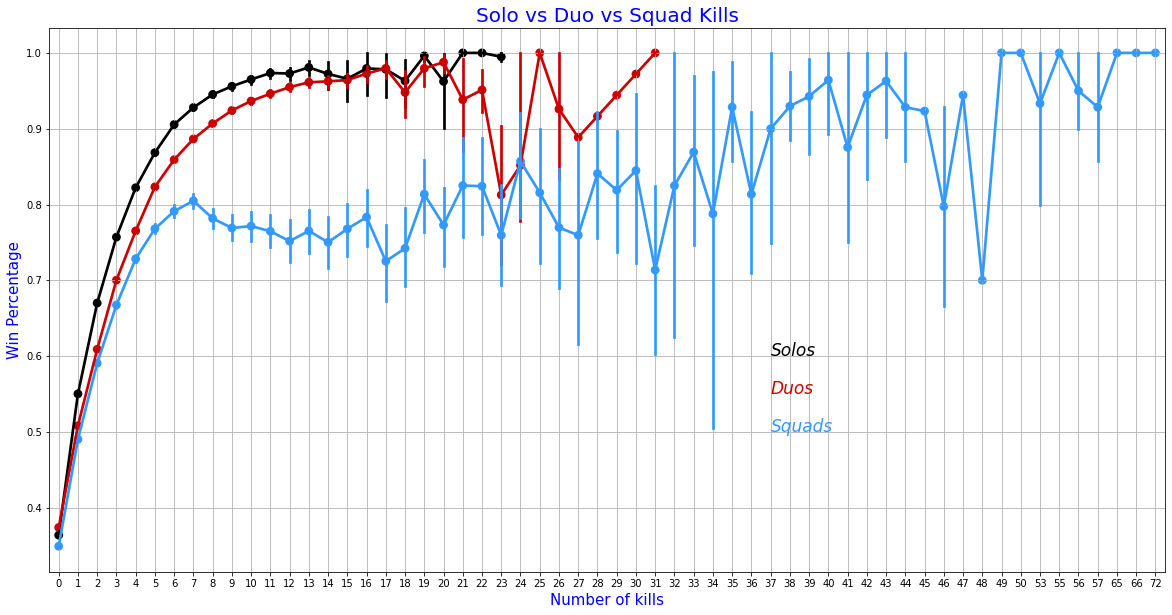

In [19]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid() #줄금표시
plt.show()

In [20]:
m_types2 = train.loc[:,"matchType"].value_counts().to_frame()
aggregated_squads = m_types2.loc[["squad-fpp","squad","normal-squad-fpp","normal-squad"],"matchType"].sum()
aggregated_duos = m_types2.loc[["duo-fpp","duo","normal-duo-fpp","normal-duo"],"matchType"].sum()
aggregated_solo = m_types2.loc[["solo-fpp","solo","normal-solo-fpp","normal-solo"],"matchType"].sum()
aggregated_mt = pd.DataFrame([aggregated_squads,aggregated_duos,aggregated_solo], index=["squad","duo","solo"], columns =["count"])
aggregated_mt

,count
squad,2355397
duo,1286014
solo,698233


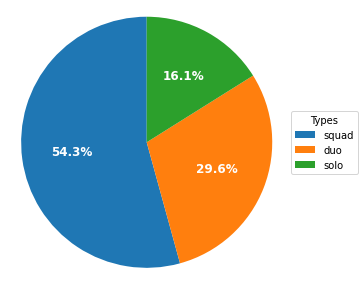

In [21]:
fig1, ax1 = plt.subplots(figsize=(5, 5))
labels = ['squad', 'duo', 'solo']

wedges, texts, autotexts = ax1.pie(aggregated_mt["count"],textprops=dict(color="w"), autopct='%1.1f%%', startangle=90)

ax1.axis('equal')
ax1.legend(wedges, labels,
          title="Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=12, weight="bold")
plt.show()

<Figure size 864x288 with 0 Axes>

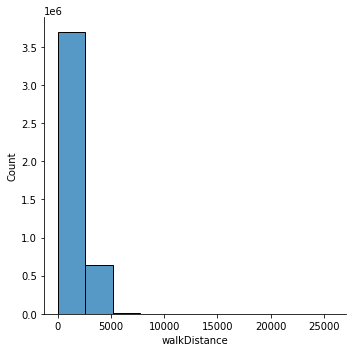

In [22]:
plt.figure(figsize = (12,4))
sns.displot(train['walkDistance'], bins=10)
plt.show()

In [23]:
train[train['walkDistance']>=10000].head()

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
23026,b0a804a610e9b0,0,1,0.00000,0,0,0,0,0,0.000000,...,0.816406,99,0.00,0.000000,99.99,115.14,1,13538.303955,False,0.0
34344,a15d93e7165b05,0,3,23.21875,0,0,1,0,0,0.000000,...,0.947266,65,0.00,31.345313,27.00,249.75,4,10072.912292,False,0.0
49312,d0afbf5c3a6dc9,0,4,117.18750,1,0,1,1,1,6.824219,...,0.913086,92,1.08,126.562500,50.76,155.52,5,12444.758797,False,0.0
68590,926681ea721a47,0,1,32.34375,0,0,1,0,0,0.000000,...,0.833496,96,0.00,33.637500,50.96,45.76,2,12485.812500,False,0.0
94400,923b57b8b834cc,1,1,73.06250,0,0,3,0,0,0.000000,...,0.819336,73,0.00,92.789375,92.71,17.78,4,11490.625000,False,0.0


<Figure size 864x288 with 0 Axes>

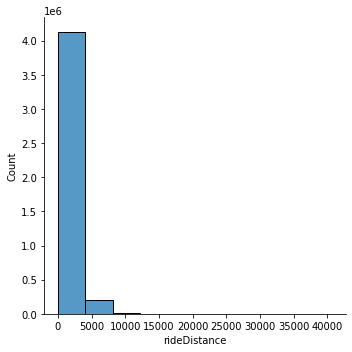

In [24]:
plt.figure(figsize = (12,4))
sns.displot(train['rideDistance'], bins=10)
plt.show()

In [25]:
train[train['rideDistance']>=20000].head()

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
28588,6ebea3b4f55b4a,0,0,99.1875,0,0,1,1,1,5.417969,...,0.642090,96,1.04,103.155,99.84,106.08,1,26312.500,False,0.000000
63015,8b36eac66378e4,0,0,0.0000,0,0,0,0,0,0.000000,...,0.537598,94,0.00,0.000,99.64,104.94,0,22073.375,False,0.000000
70507,3bfd8d66edbeff,0,0,100.0000,0,0,0,1,1,3.923828,...,0.887695,98,1.02,102.000,100.98,138.72,0,28915.500,False,0.000000
72763,d92bf8e696b61d,0,0,0.0000,0,0,0,0,0,0.000000,...,0.791504,97,0.00,0.000,99.91,15.45,0,21199.000,False,0.000000
95276,d055504340e5f4,0,7,778.0000,0,1,2,7,2,162.375000,...,0.978516,94,7.42,824.680,99.64,86.92,9,26731.000,False,0.142857


<Figure size 864x288 with 0 Axes>

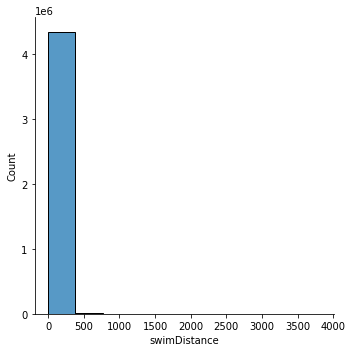

In [26]:
plt.figure(figsize = (12,4))
sns.displot(train['swimDistance'], bins=10)
plt.show()

In [27]:
train[train['swimDistance']>=1500].head()

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
177973,f01eb1073ef377,0,5,78.1250,1,0,1,0,0,0.0,...,0.958984,98,0.0,79.687500,51.00,121.38,6,3298.000000,False,0.0
274258,d6e13468e28ab4,0,4,53.3125,0,0,16,0,0,0.0,...,0.959961,93,0.0,57.044375,27.82,149.80,20,10112.000000,False,0.0
605711,0dcda56c3bc67f,0,0,0.0000,0,0,0,0,0,0.0,...,0.407471,96,0.0,0.000000,29.12,47.84,0,3590.000000,False,0.0
766045,7d58954d409084,0,0,100.0000,1,0,0,0,0,0.0,...,0.555664,95,0.0,105.000000,29.40,255.15,0,3470.007801,False,0.0
845213,9f4959a9f9c133,0,0,0.0000,0,0,0,0,0,0.0,...,0.849609,94,0.0,0.000000,99.64,182.32,0,1992.687500,False,0.0


<Figure size 864x288 with 0 Axes>

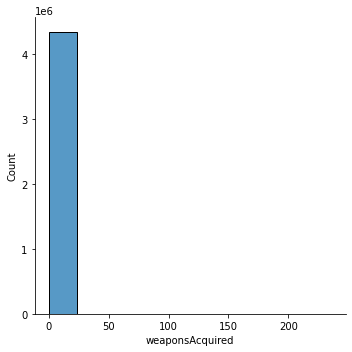

In [28]:
plt.figure(figsize = (12,4))
sns.displot(train['weaponsAcquired'], bins=10)
plt.show()

In [29]:
train[train['weaponsAcquired']>=30].head()

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
1292,b181e5bc4f0c1d,6,0,1750.0,0,6,2,15,3,69.875,...,0.714355,32,25.20,2940.00,13.44,16.80,2,2794.0,False,0.400000
26480,0f09bd72c4ba97,0,0,1973.0,0,5,4,15,2,240.500,...,0.856934,28,25.80,3393.56,13.76,3.44,4,512.0,False,0.333333
27212,5360762aa9fe02,0,0,0.0,0,0,0,0,0,0.000,...,0.000000,49,0.00,0.00,19.63,194.79,0,5301.0,False,0.000000
31936,f13924df7c2ecc,7,0,1479.0,18,3,5,16,2,77.000,...,1.000000,38,25.92,2395.98,8.10,268.92,5,494.5,False,0.187500
37903,0104eeb664494d,8,0,755.0,7,2,0,8,2,125.000,...,0.600098,41,12.72,1200.45,9.54,106.53,0,2643.0,False,0.250000


<Figure size 864x288 with 0 Axes>

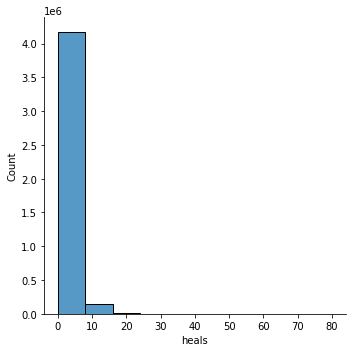

In [30]:
plt.figure(figsize = (12,4))
sns.displot(train['heals'], bins=10)
plt.show()

In [31]:
train[train['heals']>=30].head()

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
16417,4983ab459ce98c,0,4,227.5,0,0,32,1,1,70.1875,...,0.868652,100,1.0,227.50,100.00,168.00,36,2678.218750,False,0.0
18405,69473402649f11,0,2,0.0,0,0,47,0,0,0.0000,...,0.937012,96,0.0,0.00,99.84,5.20,49,6855.000000,False,0.0
26412,46bb8eaf9bf8ab,0,3,975.5,6,2,32,10,3,155.7500,...,0.740723,96,10.4,1014.52,29.12,107.12,35,2702.742188,False,0.2
32939,4aad368e132613,0,4,0.0,0,0,31,0,0,0.0000,...,0.899902,54,0.0,0.00,45.26,128.48,35,3203.000000,False,0.0
40363,4d0277f0d45c3c,0,1,0.0,0,0,30,0,0,0.0000,...,0.864746,97,0.0,0.00,99.91,108.15,31,4579.406250,False,0.0


<Figure size 864x288 with 0 Axes>

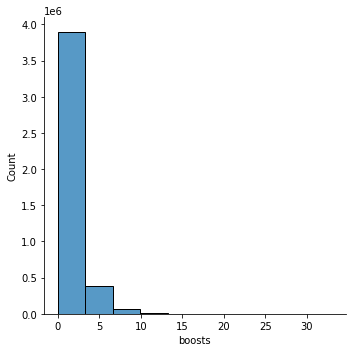

In [32]:
plt.figure(figsize = (12,4))
sns.displot(train['boosts'], bins=10)
plt.show()

In [33]:
train[train['boosts']>=20].head()

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
59311,59c7587fd0a589,1,21,254.625,1,0,3,2,2,75.6875,...,0.918457,100,2.00,254.625,50.00,29.00,24,4048.5,False,0.000000
143873,c540e9500fb8ac,0,20,452.500,1,0,1,3,1,65.8750,...,0.979492,99,3.03,457.025,50.50,62.62,21,2812.0,False,0.000000
190700,a26a5d3214d2d8,0,20,0.000,0,0,5,0,0,0.0000,...,0.885254,95,0.00,0.000,101.85,96.60,25,2030.0,False,0.000000
450791,dd814381c28540,0,33,787.500,6,3,3,8,1,106.3125,...,0.935547,95,8.40,826.875,33.60,121.80,36,2790.0,False,0.375000
687032,fb48905b205c76,0,21,978.500,0,2,2,11,1,446.5000,...,1.000000,93,11.77,1046.995,99.51,235.40,23,8796.0,False,0.181818


<Figure size 864x288 with 0 Axes>

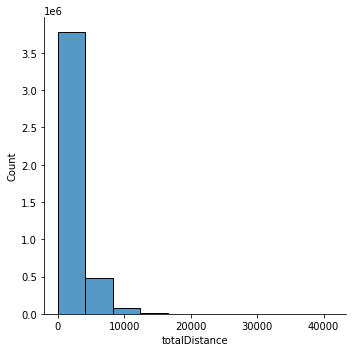

In [34]:
plt.figure(figsize = (12,4))
sns.displot(train['totalDistance'], bins=10)
plt.show()

In [35]:
train[train['totalDistance']>=15000].head()

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
1128,97a3b3487dcb02,2,4,219.12500,1,0,12,2,1,51.718750,...,1.000000,99,2.02,221.316250,50.50,101.00,16,15664.000000,False,0.0
4906,48167b9435e7c1,0,2,16.21875,0,0,2,0,0,0.000000,...,0.750000,95,0.00,17.029688,30.45,25.20,4,17840.000000,False,0.0
28588,6ebea3b4f55b4a,0,0,99.18750,0,0,1,1,1,5.417969,...,0.642090,96,1.04,103.155000,99.84,106.08,1,26312.500000,False,0.0
34367,2e25c25858a589,0,2,76.75000,1,0,1,0,0,0.000000,...,0.911133,92,0.00,82.890000,49.68,42.12,3,16080.671875,False,0.0
38059,43be135286512b,0,0,0.00000,0,0,0,0,0,0.000000,...,0.687012,98,0.00,0.000000,102.00,190.74,0,15020.000000,False,0.0


<Figure size 864x288 with 0 Axes>

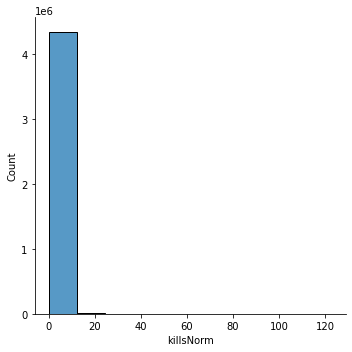

In [36]:
plt.figure(figsize = (12,4))
sns.displot(train['killsNorm'], bins=10)
plt.show()

In [37]:
train[train['killsNorm']>=12].head()

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
300,15535f0f9d9e46,1,7,1120.0,8,3,1,14,3,112.5000,...,1.000000,98,14.28,1142.40,31.62,25.50,8,3504.0,False,0.214286
600,2c42aa41a9b7a9,2,6,1563.0,10,1,7,13,3,270.2500,...,0.961426,97,13.39,1609.89,27.81,61.80,13,5687.0,False,0.076923
1292,b181e5bc4f0c1d,6,0,1750.0,0,6,2,15,3,69.8750,...,0.714355,32,25.20,2940.00,13.44,16.80,2,2794.0,False,0.400000
1833,7c64d2bc26824a,1,3,1228.0,0,1,3,12,2,99.0000,...,0.898926,100,12.00,1228.00,100.00,178.00,6,3810.0,False,0.083333
2315,68629fe15a40c9,3,7,1098.0,7,5,4,12,2,71.1875,...,1.000000,91,13.08,1196.82,28.34,80.66,11,5948.0,False,0.416667


<Figure size 864x288 with 0 Axes>

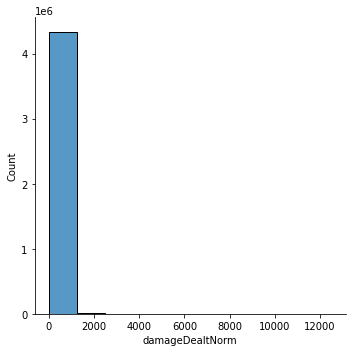

In [38]:
plt.figure(figsize = (12,4))
sns.displot(train['damageDealtNorm'], bins=10)
plt.show()

In [39]:
train[train['damageDealtNorm']>=1500].head()

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
600,2c42aa41a9b7a9,2,6,1563.0,10,1,7,13,3,270.250000,...,0.961426,97,13.39,1609.890,27.81,61.80,13,5687.0000,False,0.076923
1292,b181e5bc4f0c1d,6,0,1750.0,0,6,2,15,3,69.875000,...,0.714355,32,25.20,2940.000,13.44,16.80,2,2794.0000,False,0.400000
2569,45fc89f9b11eaf,1,4,2324.0,13,8,2,21,2,192.125000,...,1.000000,97,21.63,2393.720,50.47,98.88,6,4708.0000,False,0.380952
2769,662c9c7f9e87d0,4,0,970.5,6,4,17,11,2,21.609375,...,1.000000,11,20.79,1834.245,13.23,451.71,17,90.8125,False,0.363636
5589,1ddf8645b8648a,1,11,2033.0,13,4,7,17,2,327.750000,...,1.000000,100,17.00,2033.000,50.00,64.00,18,4452.0000,False,0.235294


<Figure size 864x288 with 0 Axes>

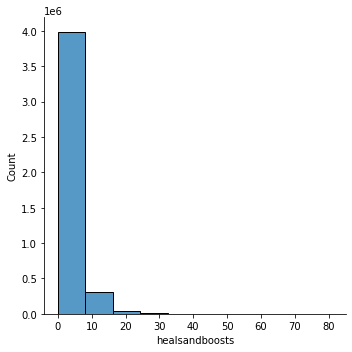

In [40]:
plt.figure(figsize = (12,4))
sns.displot(train['healsandboosts'], bins=10)
plt.show()

In [41]:
train[train['healsandboosts']>=24].head()

,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,kills,killStreaks,longestKill,...,winPlacePerc,playersJoined,killsNorm,damageDealtNorm,maxPlaceNorm,matchDurationNorm,healsandboosts,totalDistance,killsWithoutMoving,headshot_rate
369,0d0d51ca54ab0c,0,4,254.625,1,1,24,1,1,107.125000,...,0.923340,95,1.05,267.35625,28.35,63.00,28,5648.0,False,1.000000
510,06635c0e0a492d,0,0,201.125,1,0,25,1,1,4.722656,...,0.680664,94,1.06,213.19250,50.88,262.88,25,3338.5,False,0.000000
1689,173e6d8d2646d8,3,9,1028.000,7,2,15,9,2,235.750000,...,0.978516,96,9.36,1069.12000,49.92,124.80,24,6675.0,False,0.222222
2296,a9586bc2797969,0,5,0.000,0,0,29,0,0,0.000000,...,0.926270,96,0.00,0.00000,99.84,93.60,34,2801.0,False,0.000000
2799,636dd1f9650bf2,5,9,478.750,1,0,23,4,2,406.750000,...,0.976562,86,4.56,545.77500,50.16,117.42,32,4996.0,False,0.000000


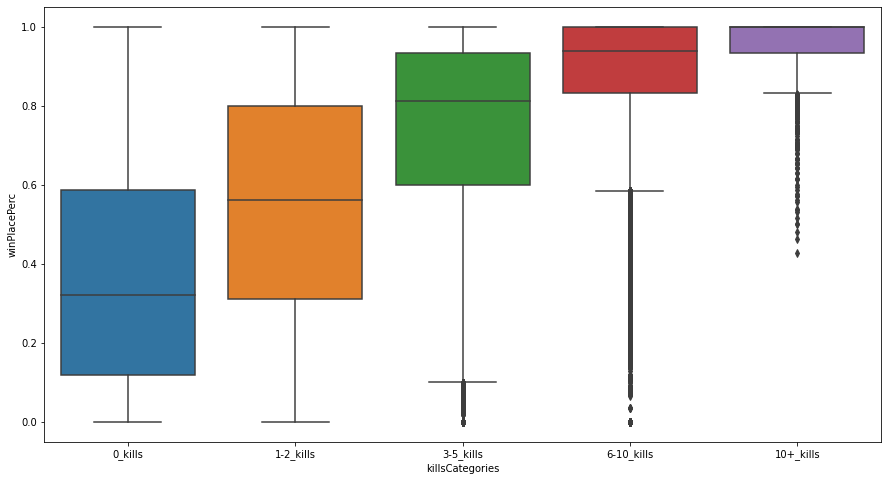

In [78]:
kills = train.copy() 

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 80], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

In [42]:
test.drop(test[test['roadKills'] > 10].index, inplace=True)
test.drop(test[test['killsWithoutMoving'] == True].index, inplace=True)
test.drop(test[test['kills'] > 30].index, inplace=True)
test.drop(test[test['longestKill'] >= 1000].index, inplace=True)
test.drop(test[(test['headshot_rate'] == 1) & (test['kills'] > 6)].index, inplace=True)
test.drop(test[test['walkDistance'] >= 10000].index, inplace=True)
test.drop(test[test['rideDistance'] >= 20000].index, inplace=True)
test.drop(test[test['swimDistance'] >= 1500].index, inplace=True)
test.drop(test[test['weaponsAcquired'] >= 30].index, inplace=True)
test.drop(test[test['heals'] >= 30].index, inplace=True)
test.drop(test[test['boosts'] >= 20].index, inplace=True)
test.drop(test[test['totalDistance'] >= 15000].index, inplace=True)
test.drop(test[test['killsNorm'] >= 12].index, inplace=True)
test.drop(test[test['damageDealtNorm'] >= 1500].index, inplace=True)
test.drop(test[test['healsandboosts'] >= 24].index, inplace=True)

In [43]:
train.drop(train[train['roadKills'] > 10].index, inplace=True)
train.drop(train[train['killsWithoutMoving'] == True].index, inplace=True)
train.drop(train[train['kills'] > 30].index, inplace=True)
train.drop(train[train['longestKill'] >= 1000].index, inplace=True)
train.drop(train[(train['headshot_rate'] == 1) & (train['kills'] > 6)].index, inplace=True)
train.drop(train[train['walkDistance'] >= 10000].index, inplace=True)
train.drop(train[train['rideDistance'] >= 20000].index, inplace=True)
train.drop(train[train['swimDistance'] >= 1500].index, inplace=True)
train.drop(train[train['weaponsAcquired'] >= 30].index, inplace=True)
train.drop(train[train['heals'] >= 30].index, inplace=True)
train.drop(train[train['boosts'] >= 20].index, inplace=True)
train.drop(train[train['totalDistance'] >= 15000].index, inplace=True)
train.drop(train[train['killsNorm'] >= 12].index, inplace=True)
train.drop(train[train['damageDealtNorm'] >= 1500].index, inplace=True)
train.drop(train[train['healsandboosts'] >= 24].index, inplace=True)

In [44]:
# sample = 500000
# df_sample = train.sample(sample)

In [45]:
# X = df_sample.drop(columns = ['winPlacePerc'])
# y = df_sample['winPlacePerc']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# from sklearn.metrics import accuracy_score

In [47]:
# base = y_train.mode()[0]
# baseline = len(y_train) * [base]
# baseline_acc = accuracy_score(y_train, baseline)
# round(baseline_acc,2)
# print(f'기준모델의 정확도는 {round(baseline_acc,2)} 입니다')

In [48]:
from sklearn.model_selection import train_test_split
X = train.drop(["matchId","matchType","winPlacePerc"], axis=1)
y = train["winPlacePerc"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error

baseline = [y_train.mean()] * len(y_train)
baseline_r2 = r2_score(y_train, baseline)
baseline_mae = mean_absolute_error(y_train, baseline)
print(f'기준모델의 r2_score: {baseline_r2}')
print(f'기준모델의 mae : {baseline_mae}')

기준모델의 r2_score: 0.0
기준모델의 mae : 0.26734192117683725


In [50]:
baseline_score = train["winPlacePerc"].value_counts(normalize=True).max()
print("baseline score:", baseline_score)

baseline score: 0.04985151609697607


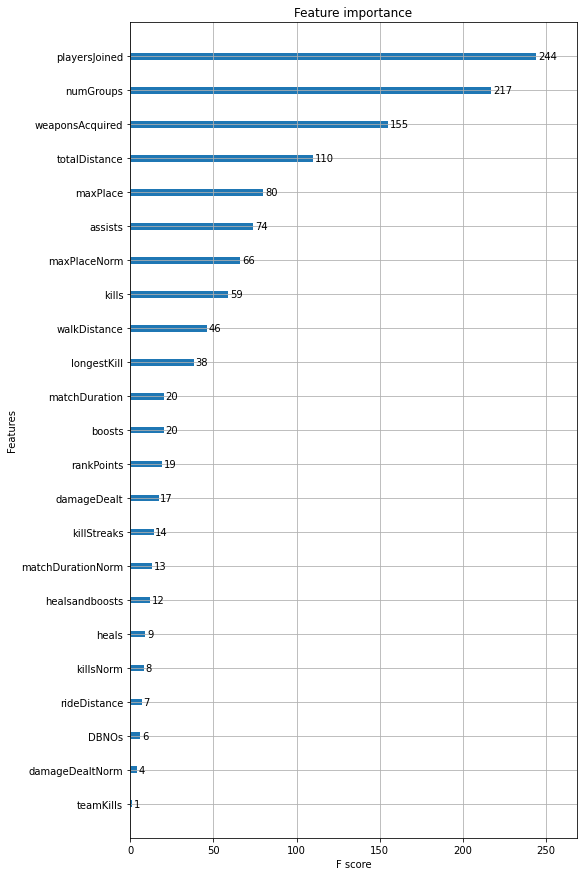

In [51]:
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

train.dropna(subset=["winPlacePerc"], inplace=True) 

X = train.drop(["matchId","matchType","winPlacePerc"], axis=1)
y = train["winPlacePerc"]

col_names = X.columns

transformer = Normalizer().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns=col_names)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

D_train = xgb.DMatrix(X_train, label=Y_train)
D_test = xgb.DMatrix(X_test, label=Y_test)
param = {
    'eta': 0.15, 
    'max_depth': 5,  
    'num_class': 2} 

steps = 20  
model = xgb.train(param, D_train, steps)
fig, ax1 = plt.subplots(figsize=(8,15))
xgb.plot_importance(model, ax=ax1)
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("RMSE = {}".format(mean_squared_error(Y_test, best_preds)**0.5))

RMSE = 0.5619439919771394


In [53]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [54]:
# train1, val = train_test_split(train, test_size=0.2, random_state=42)

# features= [
#         'assists',                    
#         'damageDealtNorm' ,     
#         'DBNOs' ,            
#         'headshotKills'  ,   
#         'healsandboosts'  ,             
        
            
#         'killsNorm'  ,         
#         'damageDealtNorm'  ,    
#         'longestKill'   ,    
#         'matchDuration'   ,  
#         'maxPlace'   ,      
#         'numGroups'  ,     
#         'rankPoints'   ,     
#         'revives'   ,       
#         'rideDistance' ,    
#         'roadKills'     ,    
#         'swimDistance' ,       
#         'teamKills'   ,      
#         'vehicleDestroys' ,
#         'walkDistance'  ,    
#         'weaponsAcquired'
#        ]
# target = "winPlacePerc"
# X_train = train1[features]
# y_train = train1[target]
# X_val = val[features]
# y_val = val[target]

In [55]:
# X_train=X_train.reset_index(drop=True)

In [56]:
# y_train=y_train.reset_index(drop=True)

In [57]:
# pipe_rf = make_pipeline(
#     OrdinalEncoder(),
#     xgb.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
#                            colsample_bytree=1, max_depth=7)
# )
# pipe_rf.fit(X_train, y_train)

In [58]:
# import matplotlib.pyplot as plt

# plt.rcParams["figure.dpi"] = 144
# from pdpbox.pdp import pdp_isolate, pdp_plot

# target_feature = "winPlacePerc"

# isolated = pdp_isolate(
#     model=pipe_rf,
#     dataset=X_test,
#     model_features=X_test.columns,
#     feature=target_feature,
#     grid_type="percentile",  
#     #num_grid_points = 10,  
# )
# pdp_plot(isolated, feature_name=target_feature)

In [59]:
from xgboost import XGBClassifier
from category_encoders import OrdinalEncoder

In [60]:
# boosting = XGBClassifier(
#     n_estimators=1000,
#     objective="binary:logistic",  # default
#     learning_rate=0.2,
#     subsample=0.8,
#     colsample_bytree=0.8,
# )

In [61]:
# encoder = OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train) 
# X_val_encoded = encoder.transform(X_val)

In [62]:
# from pdpbox.pdp import pdp_isolate, pdp_plot

# target_feature = "kills"

# isolated = pdp_isolate(
#     model=boosting,
#     dataset=X_val_encoded,
#     model_features=X_val.columns,
#     feature=target_feature,
#     grid_type="percentile",  # default = 'percentile', or 'equal'
#     num_grid_points=10,  # default = 10
# )
# pdp_plot(isolated, feature_name=target_feature)

In [63]:
#랜덤포레스트

In [64]:
sample = 500000
df_sample = train.sample(sample)

In [65]:
df = df_sample.drop(columns = ["matchId","matchType","winPlacePerc"]) #all columns except target
y = df_sample['winPlacePerc']

In [66]:
def split_vals(a, n : int): 
    return a[:n].copy(), a[n:].copy()
val_perc = 0.12 
n_valid = int(val_perc * sample) 
n_trn = len(df)-n_valid

raw_train, raw_valid = split_vals(df_sample, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train, y_valid = split_vals(y, n_trn)


print('Sample train shape: ', X_train.shape, 
      'Sample target shape: ', y_train.shape, 
      'Sample validation shape: ', X_valid.shape)

Sample train shape:  (440000, 30) Sample target shape:  (440000,) Sample validation shape:  (60000, 30)


In [67]:
from sklearn.metrics import mean_absolute_error

def print_score(m : RandomForestRegressor):
    res = ['mae train: ', mean_absolute_error(m.predict(X_train), y_train), 
           'mae val: ', mean_absolute_error(m.predict(X_valid), y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [68]:
m1 = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
m1.fit(X_train, y_train)
print_score(m1)

['mae train: ', 0.06576480164813392, 'mae val: ', 0.10022794483451684]


In [69]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [70]:
fi = rf_feat_importance(m1, df); fi[:10]

,cols,imp
27,totalDistance,0.233020
19,walkDistance,0.231472
20,weaponsAcquired,0.111310
26,healsandboosts,0.108893
1,boosts,0.073925
5,heals,0.033350
14,rideDistance,0.030556
2,damageDealt,0.024856
8,longestKill,0.019233
23,damageDealtNorm,0.017351


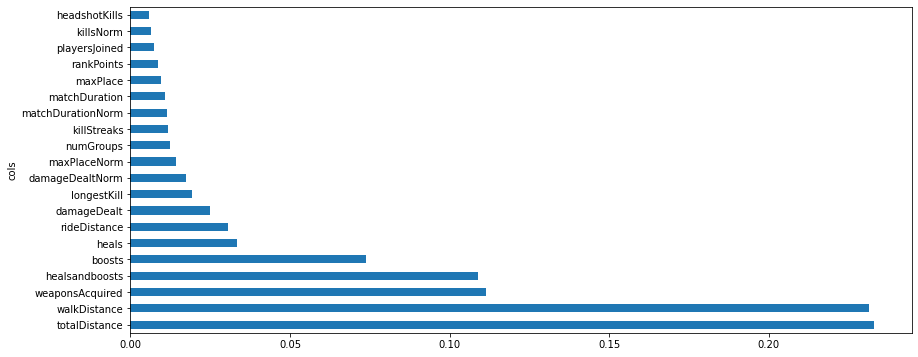

In [71]:
plot1 = fi[:20].plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh')
plot1

In [72]:
to_keep = fi[fi.imp>0.005].cols


In [73]:
df_keep = df[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [74]:
m2 = RandomForestRegressor(n_estimators=80, min_samples_leaf=3, max_features='sqrt',
                          n_jobs=-1)
m2.fit(X_train, y_train)
print_score(m2)

['mae train: ', 0.06296488883552645, 'mae val: ', 0.10048069110798669]


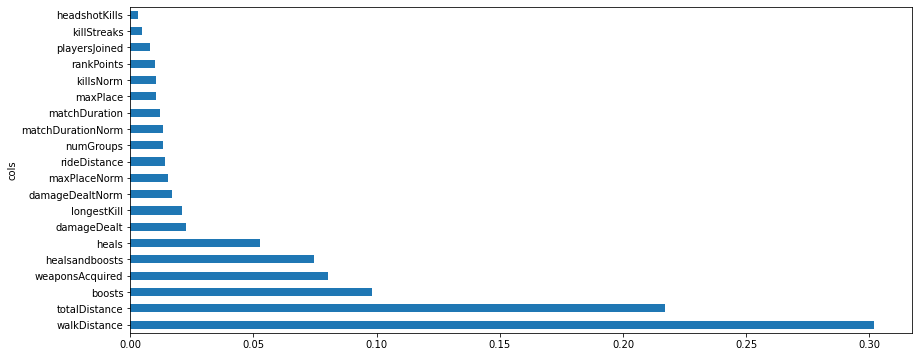

In [75]:
fi_to_keep = rf_feat_importance(m2, df_keep)
plot2 = fi_to_keep.plot('cols', 'imp', figsize=(14,6), legend=False, kind = 'barh')
plot2

In [76]:
# encoder = OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train) 
# X_val_encoded = encoder.transform(X_val)